In [40]:
# BASIC PACKAGES
import pandas as pd
import numpy as np
import missingno as msno
from collections import Counter
from datetime import datetime, timedelta

# VISUALIZATION PACKAGES
import scikitplot as skplt
import seaborn as sns
import matplotlib.pyplot as plt

In [120]:
df_eng= pd.read_csv('takehome_user_engagement.csv')
df_users= pd.read_csv('takehome_users.csv', encoding = "ISO-8859-1")

In [5]:
df_users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,4/22/2014 3:53,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,11/15/2013 3:45,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,3/19/2013 23:14,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,5/21/2013 8:09,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,1/17/2013 10:14,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [92]:
df_users.iloc[242]

object_id                                                 243
creation_time                                  6/9/2013 20:13
name                                            Silva Estevan
email                         EstevanDiasSilva@jourrapide.com
creation_source                                        SIGNUP
last_session_creation_time                       1371154432.0
opted_in_to_mailing_list                                    1
enabled_for_marketing_drip                                  0
org_id                                                      7
invited_by_user_id                                        NaN
Name: 242, dtype: object

In [6]:
df_users.shape

(12000, 10)

In [7]:
df_eng.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [8]:
df_eng.shape

(207917, 3)

In [14]:
df_eng['time_stamp'] = pd.to_datetime(df_eng['time_stamp'])

In [17]:
df_eng.dtypes

time_stamp    datetime64[ns]
user_id                int64
visited                int64
dtype: object

In [19]:
df_eng.user_id.value_counts()

3623     606
906      600
1811     593
7590     590
8068     585
        ... 
4699       1
4698       1
4697       1
4696       1
12000      1
Name: user_id, Length: 8823, dtype: int64

In [22]:
print('Min timestamp:', 
      df_eng.time_stamp.min())
print('Max timestamp:', 
      df_eng.time_stamp.max())

Min timestamp: 2012-05-31 08:20:06
Max timestamp: 2014-06-06 14:58:50


In [105]:
def find_adopted(df, user_id):
    boolean= False
    tmp= df[df['user_id'] == user_id].reset_index(drop=True)
    for i in range(len(tmp)):
        if len(tmp) == 1 or i == len(tmp)-2:
            break
        if tmp.time_stamp[i+1] < (tmp.time_stamp[i] + timedelta(days=7)):
            if tmp.time_stamp[i+2] < (tmp.time_stamp[i] + timedelta(days=7)):
                boolean= True
    return boolean

In [106]:
adopted_series = []
for i in range(len(df_users)):
    adopted_series.append(find_adopted(df_eng, i+1))

In [108]:
len(adopted_series)

12000

In [121]:
df_users['adopted'] = adopted_series
df_users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted
0,1,4/22/2014 3:53,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,False
1,2,11/15/2013 3:45,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,True
2,3,3/19/2013 23:14,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,False
3,4,5/21/2013 8:09,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,False
4,5,1/17/2013 10:14,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,False


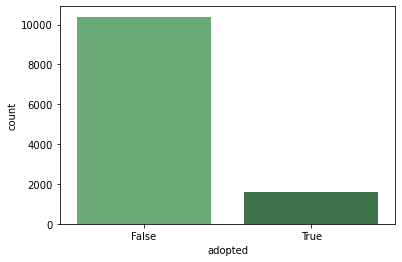

In [154]:
fig = plt.figure()
fig.patch.set_facecolor('white')
ax = sns.countplot(x='adopted', data=df1, palette='Greens_d')

Looks like only a very small portion of users can be considered as 'adopted users'

In [122]:
#check for missing values 
df_users.isna().sum()

object_id                        0
creation_time                    0
name                             0
email                            0
creation_source                  0
last_session_creation_time    3177
opted_in_to_mailing_list         0
enabled_for_marketing_drip       0
org_id                           0
invited_by_user_id            5583
adopted                          0
dtype: int64

In [123]:
#replace invited_by_user_id to be a binary value
df_users['invited_by_user_id'] = df_users.invited_by_user_id.notnull()

In [126]:
def encode_and_bind(original_dataframe, feature_to_encode):
    dummies = pd.get_dummies(original_dataframe[feature_to_encode])
    res = pd.concat([original_dataframe, dummies], axis=1)
    res = res.drop([feature_to_encode], axis=1)
    return(res) 

In [127]:
#Dropping irrelevant features 
#creation time may have relevance, but will leave it out for the scope of this exercise
df1 = encode_and_bind(df_users.drop(['object_id', 'creation_time', 'name', 'email', 'last_session_creation_time', 'org_id'], 
                    axis=1), 'creation_source')
df1

,opted_in_to_mailing_list,enabled_for_marketing_drip,invited_by_user_id,adopted,GUEST_INVITE,ORG_INVITE,PERSONAL_PROJECTS,SIGNUP,SIGNUP_GOOGLE_AUTH
0,1,0,True,False,1,0,0,0,0
1,0,0,True,True,0,1,0,0,0
2,0,0,True,False,0,1,0,0,0
3,0,0,True,False,1,0,0,0,0
4,0,0,True,False,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...
11995,0,0,True,False,0,1,0,0,0
11996,0,0,False,False,0,0,0,0,1
11997,1,1,True,False,1,0,0,0,0
11998,0,0,False,False,0,0,1,0,0


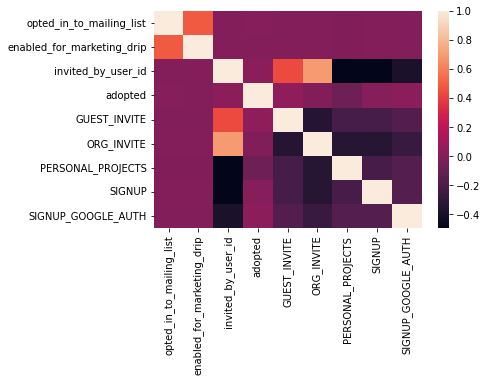

In [128]:
sns.heatmap(df1.corr());

This suggests there's little correlation between 'Adopted' users and any feature in the dataset. Let's explore some visualizations to confirm

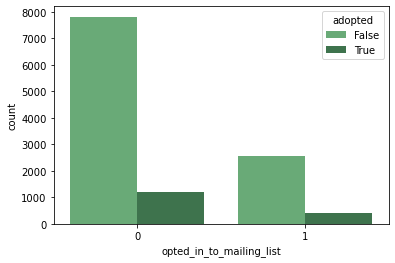

In [130]:
fig = plt.figure()
fig.patch.set_facecolor('white')
ax = sns.countplot(x='opted_in_to_mailing_list', hue='adopted', data=df1, palette='Greens_d')

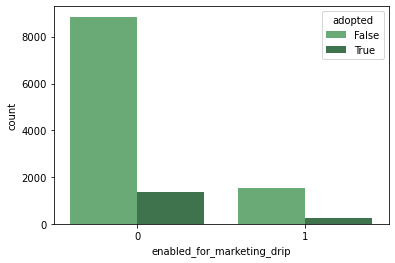

In [132]:
fig = plt.figure()
fig.patch.set_facecolor('white')
ax = sns.countplot(x='enabled_for_marketing_drip', hue='adopted', data=df1, palette='Greens_d')

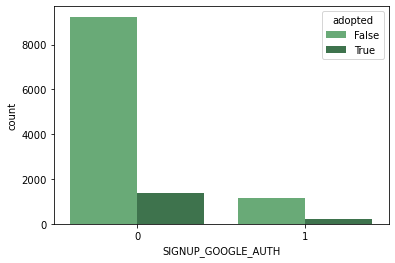

In [153]:
fig = plt.figure()
fig.patch.set_facecolor('white')
ax = sns.countplot(x='SIGNUP_GOOGLE_AUTH', hue='adopted', data=df1, palette='Greens_d')

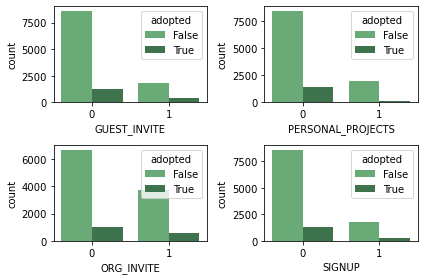

In [152]:
fig, ax = plt.subplots(2,2)
fig.patch.set_facecolor('white')
sns.countplot(x='GUEST_INVITE', hue='adopted', data=df1, palette='Greens_d', ax=ax[0,0])
sns.countplot(x='PERSONAL_PROJECTS', hue='adopted', data=df1, palette='Greens_d', ax=ax[0,1])
sns.countplot(x='ORG_INVITE', hue='adopted', data=df1, palette='Greens_d', ax=ax[1,0])
sns.countplot(x='SIGNUP', hue='adopted', data=df1, palette='Greens_d', ax=ax[1,1])
plt.tight_layout()
plt.show()

Indeed, there does not seem to be much correlation between these values. The most we can infer is there is a positive correlation between some invite methods (GUEST_INVITE, SIGNUP, SIGNUP_GOOGLE_AUTH) and 'adoption' rate. These invite methods seem to show greater success.